<a href="https://colab.research.google.com/github/alifarah94/DS-Unit-2-Kaggle-Challenge/blob/master/Week_6_Day_1_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 4.0MB/s 


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train, validate = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, validate.shape,test.shape

((47520, 41), (11880, 41), (14358, 40))

In [12]:
#Creating a bassline model
train.status_group.value_counts(normalize=True)


functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest 

In [0]:
target = 'status_group'

train_features = train.drop(columns=[target,'id']) # dropping ID and target

numeric_features = train_features.select_dtypes(include='number').columns.tolist() #all numeric columns 

cardinality = train_features.select_dtypes(exclude='number').nunique() # get all categorical columns and there distinct observations
#low_cardinality = cardinality[cardinality<=50]
#low_cardinality.shape

categorical_features = cardinality[cardinality<=50].index.tolist() # if categorical columns have more then 50 unique classes drop them
#categorical_features = encoder.fit_transform(train_features[low_cardinality.index])
#categorical_features_Val = encoder.fit_transform(validate[low_cardinality.index])
#selector = SelectKBest(score_func=f_regression,k=10) 
#encoder = ce.OneHotEncoder(use_cat_names=True)


features = numeric_features + categorical_features # combine numerical and categorical features 

In [153]:
features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [0]:
x_train = train[features]
y_train = train[target]
x_validate = validate[features]
y_validate = validate[target]

In [155]:
x_validate

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
3290,0.0,0,31.509864,-1.153080,0,18,7,0,0,Lake Victoria,Kagera,True,GeoData Consultants Ltd,VWC,True,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
47666,2000.0,1576,29.838600,-4.429692,0,16,2,1,1991,Lake Tanganyika,Kigoma,True,GeoData Consultants Ltd,Water authority,False,other,other,other,vwc,user-group,pay annually,annually,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring
2538,25.0,898,37.748364,-4.061791,0,3,3,420,2011,Pangani,Kilimanjaro,True,GeoData Consultants Ltd,Water authority,NaN,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
53117,0.0,0,33.380346,-3.132556,0,19,4,0,0,Lake Victoria,Mwanza,NaN,GeoData Consultants Ltd,VWC,True,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
51817,0.0,548,37.648831,-6.725480,0,5,5,500,1985,Wami / Ruvu,Morogoro,True,GeoData Consultants Ltd,VWC,True,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,0.0,0,32.909535,-2.703095,0,19,7,0,0,Lake Victoria,Mwanza,NaN,GeoData Consultants Ltd,VWC,True,ksb,submersible,submersible,vwc,user-group,never pay,never pay,unknown,unknown,unknown,unknown,lake,river/lake,surface,communal standpipe multiple,communal standpipe
20942,0.0,844,37.418415,-3.357605,0,3,4,1,1974,Pangani,Kilimanjaro,False,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,spring,spring,groundwater,other,other
29031,0.0,0,34.219732,-3.695008,0,17,6,0,0,Internal,Shinyanga,True,GeoData Consultants Ltd,WUA,True,windmill,wind-powered,wind-powered,wua,user-group,pay annually,annually,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,communal standpipe multiple,communal standpipe
3493,200.0,1784,38.253216,-4.577348,0,4,1,1,1978,Pangani,Tanga,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [0]:
# creating pipeline
Pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), # encodes
    #SelectKBest(score_func=f_regression,k=10) ,
    SimpleImputer(strategy='mean'), # fills in the blanks
    DecisionTreeClassifier(random_state=42), # feeds to model 
)

In [0]:
Pipeline.fit(x_train,y_train);

In [28]:
y_pred = Pipeline.predict(x_validate)


array(['functional', 'functional needs repair', 'functional', ...,
       'functional', 'functional', 'non functional'], dtype=object)

In [160]:
Pipeline.score(x_validate,y_validate)

0.757996632996633

In [31]:
Pipeline.named_steps

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 'onehotencoder': OneHotEncoder(cols=['basin', 'region', 'public_meeting', 'recorded_by',
                     'scheme_management', 'permit', 'extraction_type',
                     'extraction_type_group', 'extraction_type_class',
                     'management', 'management_group', 'payment', 'payment_type',
                     'water_quality', 'quality_group', 'quantity',
                     'quantity_group', 'source', 'source_type', 'source_class',
                     'waterpoint_type', 'waterpoint_type_group'],
               drop_invariant=False, 

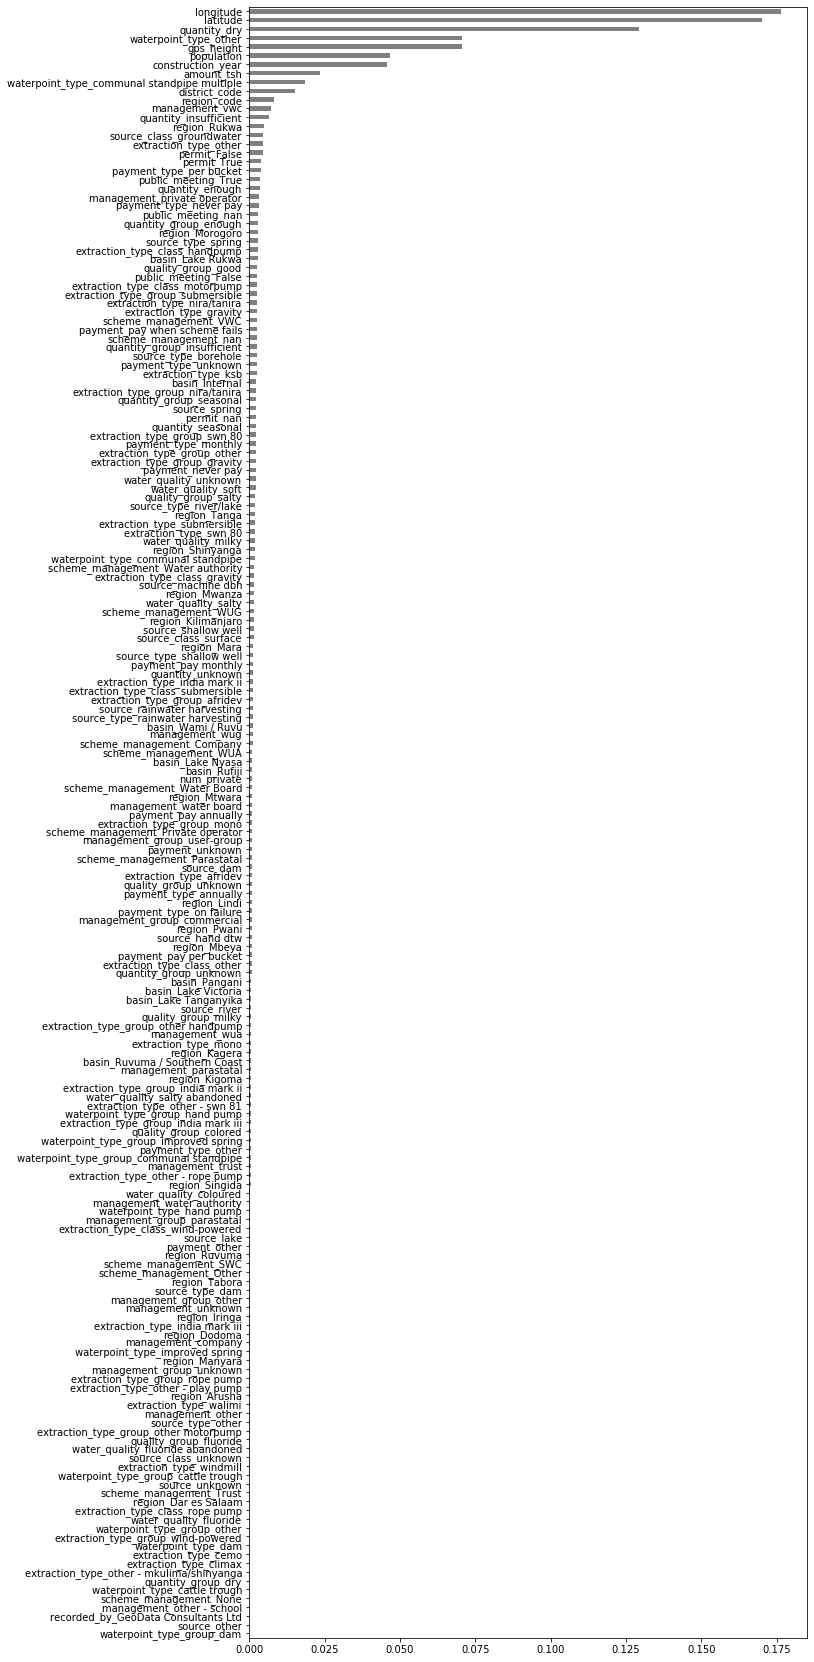

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt

model = Pipeline.named_steps['decisiontreeclassifier']
encoder = Pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(x_validate).columns
importance = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importance.sort_values().plot.barh(color='grey');